In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data
df = pd.read_csv('income.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
#adding features for analysis and drop indivitual columns

df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass')], axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country')], axis=1)
df = df.drop('education', axis = 1)
df = df.drop('fnlwgt', axis=1)


In [6]:
#making gender and income into binary values

df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [7]:
df.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
0,25,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Heatmap

In [8]:
df.corr()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
age,1.000000,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,-0.009175,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
educational-num,0.030940,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,0.004013,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,0.012343,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,-0.001394,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
capital-loss,0.056944,0.080972,0.045480,-0.031441,1.000000,0.054467,0.147554,-0.012326,-0.021457,0.001666,...,-0.008047,0.002636,-0.004503,0.005638,0.003078,-0.002338,0.004028,0.009449,-0.000118,-0.004713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-countryThailand,-0.001766,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,-0.000435,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-countryTrinadad&Tobago,0.001056,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,-0.000412,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-countryUnited-States,0.011888,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,0.002074,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-countryVietnam,-0.012337,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,-0.000736,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


<AxesSubplot:>

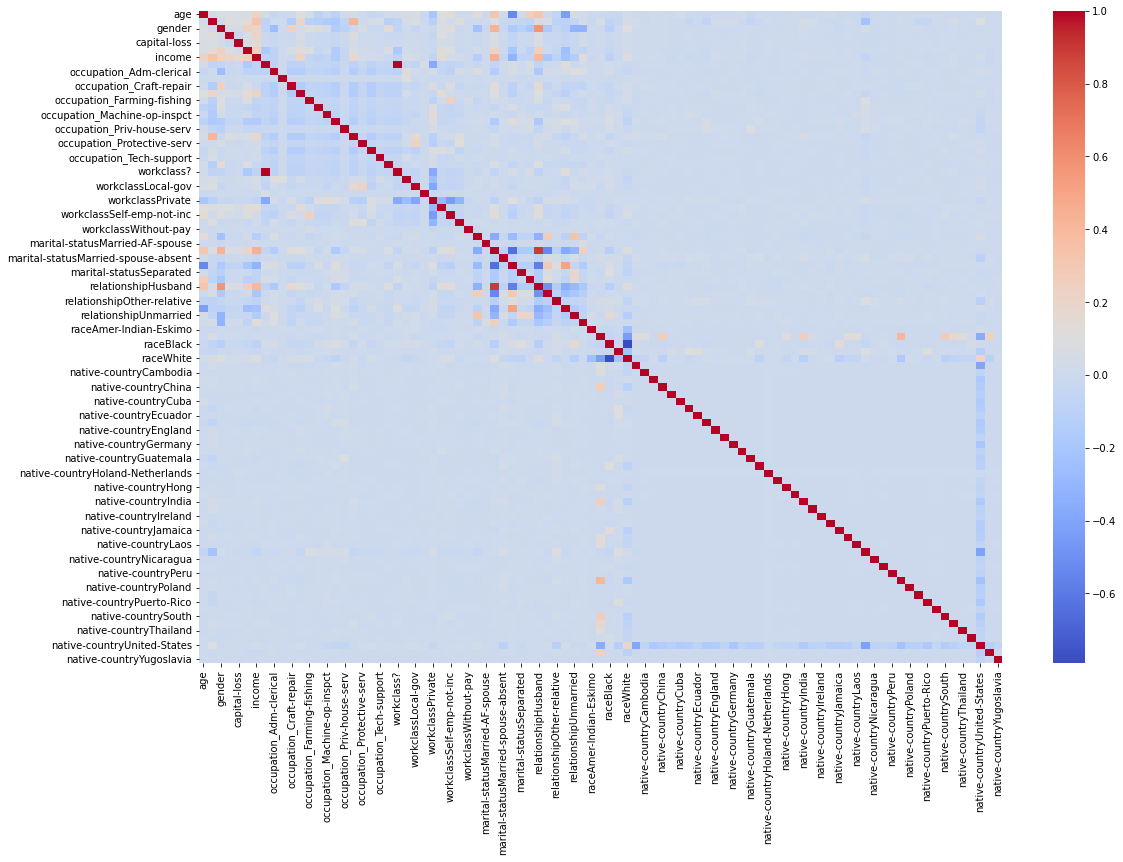

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')

# Dropping the least correlated columns

In [10]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_of_col_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_of_col_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [11]:
df_dropped.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclassSelf-emp-inc,marital-statusDivorced,marital-statusMarried-civ-spouse,marital-statusNever-married,relationshipHusband,relationshipNot-in-family,relationshipOwn-child,relationshipUnmarried,relationshipWife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0


# Updated heat map with annot

<AxesSubplot:>

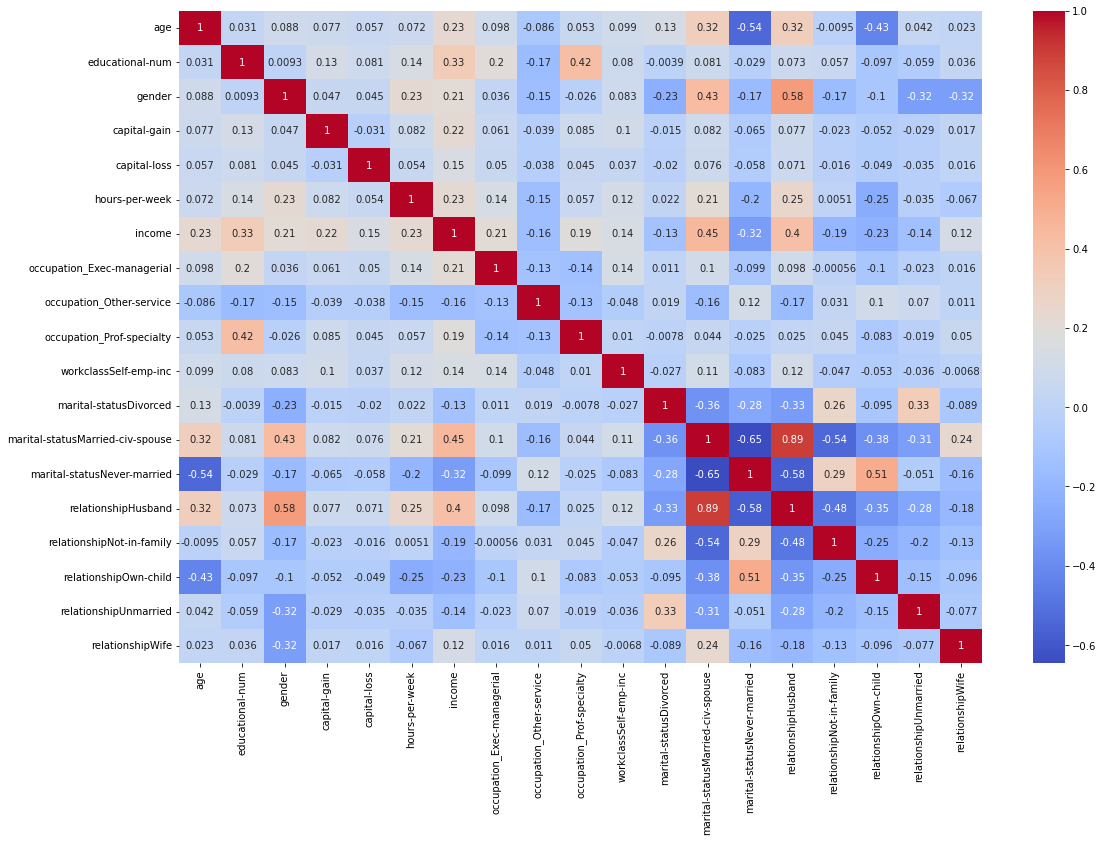

In [12]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dropped.corr(), annot = True, cmap = 'coolwarm')

# RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2)

In [14]:
train_df.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
41143,42,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18541,25,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2300,36,9,0,3325,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
40008,22,11,0,0,0,12,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2000,53,2,1,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
test_df.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
10697,53,9,1,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34491,31,10,1,4386,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6429,41,13,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44925,23,13,0,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31877,68,9,1,0,0,45,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
train_x = train_df.drop('income', axis=1)
train_y = train_df['income']

test_x = test_df.drop('income', axis=1)
test_y = test_df['income']

In [17]:
#fitting the classifier

forest = RandomForestClassifier()
forest.fit(train_x, train_y)

RandomForestClassifier()

In [18]:
#testing the score
forest.score(test_x, test_y)

0.8476814412938888

In [19]:
#checing feature importances
forest.feature_importances_

array([2.27711115e-01, 1.30586517e-01, 1.46306281e-02, 1.06405655e-01,
       3.59709705e-02, 1.13708043e-01, 2.06454480e-03, 5.05172898e-03,
       6.01760441e-05, 6.43455546e-03, 2.13622381e-02, 4.19949041e-03,
       3.62447836e-03, 4.19090188e-03, 8.18904291e-03, 2.01198653e-04,
       1.88015218e-02, 2.69959541e-03, 6.57050577e-03, 4.38502062e-03,
       4.07870769e-03, 1.88106759e-03, 4.97569741e-03, 5.30147658e-03,
       1.73447893e-06, 9.35773036e-03, 6.56591594e-03, 8.32402141e-03,
       4.32216226e-03, 1.14976361e-04, 8.04994625e-03, 3.01645209e-04,
       7.40125198e-02, 1.07082185e-03, 2.38687042e-02, 1.80341669e-03,
       1.80450069e-03, 4.69936673e-02, 9.93438812e-03, 1.62395295e-03,
       4.66606262e-03, 5.74836482e-03, 1.24405100e-02, 1.41827717e-03,
       3.27883366e-03, 4.77317277e-03, 1.07184915e-03, 6.16994623e-03,
       3.12059169e-03, 3.12896548e-04, 1.58118503e-03, 6.20931028e-04,
       3.40600759e-04, 7.86152130e-04, 2.12640244e-04, 2.02281237e-04,
      

In [20]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass?',
       'workclassFederal-gov', 'workclassLocal-gov',
       'workclassNever-worked', 'workclassPrivate',
       'workclassSelf-emp-inc', 'workclassSelf-emp-not-inc',
       'workclassState-gov', 'workclassWithout-pay',
       'marital-statusDivorced', 'marital-statusMarried-AF-spouse',
       'marital-statusMarried-civ-spouse',
       'marital-statusMarried-spouse-absent',
       'marital-statusNever-married', 'marita

In [21]:
#creating dictionary for feature name and importance

importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse = True)}

In [22]:
importances

{'age': 0.22771111483395592,
 'educational-num': 0.13058651698201637,
 'hours-per-week': 0.11370804263625801,
 'capital-gain': 0.10640565466607796,
 'marital-statusMarried-civ-spouse': 0.0740125197820838,
 'relationshipHusband': 0.046993667269118335,
 'capital-loss': 0.035970970544156995,
 'marital-statusNever-married': 0.023868704154614565,
 'occupation_Exec-managerial': 0.021362238078011186,
 'occupation_Prof-specialty': 0.01880152179483499,
 'gender': 0.014630628128916481,
 'relationshipWife': 0.012440509961352111,
 'relationshipNot-in-family': 0.009934388119120124,
 'workclassPrivate': 0.00935773035980288,
 'workclassSelf-emp-not-inc': 0.008324021412468135,
 'occupation_Other-service': 0.008189042909620128,
 'marital-statusDivorced': 0.008049946254418789,
 'occupation_Sales': 0.006570505768857077,
 'workclassSelf-emp-inc': 0.006565915943736358,
 'occupation_Craft-repair': 0.006434555457471269,
 'native-countryUnited-States': 0.006342617133621578,
 'raceWhite': 0.006169946230441739,

# hyperparameter tuning

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,250],
    'max_depth': [5,10,30,None],
    'min_samples_split': [2,4],
    'max_features':['sqrt','log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=param_grid, verbose=10)

In [24]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.820 total time=   0.5s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.5s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.6s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.813 total time=   0.7s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.812 total time=   0.7s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.819 total time=   1.8s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.812 total time=   2.0s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.813 total time=   1.8s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.856 total time=   0.8s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.860 total time=   0.8s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.8s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.860 total time=   1.7s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.865 total time=   1.7s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.856 total time=   3.3s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.860 total time=   3.3s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.854 total time=   4.0s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.857 total time=   3.6s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   3.6s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.856 total time=   1.5s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.862 total time=   1.6s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   3.3s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.862 total time=   3.1s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   3.6s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.854 total time=  10.7s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.851 total time=   9.4s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.849 total time=   9.2s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.854 total time=   9.5s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.856 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.858 total time=   1.6s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.855 total time=   3.3s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time=   3.4s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time=   3.5s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.853 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [25]:
#best estimator
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=4,
                       n_estimators=250)

In [26]:
forest = grid_search.best_estimator_
forest.score(test_x, test_y)

0.8615006653700481

In [27]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse = True)}

In [28]:
importances

{'age': 0.14944562618798668,
 'capital-gain': 0.13522620325277826,
 'educational-num': 0.13378014660194754,
 'marital-statusMarried-civ-spouse': 0.09052582506024658,
 'hours-per-week': 0.089346351891107,
 'relationshipHusband': 0.06884903104426744,
 'capital-loss': 0.04320760487465493,
 'marital-statusNever-married': 0.02627608994174382,
 'occupation_Exec-managerial': 0.024533285645152246,
 'occupation_Prof-specialty': 0.02187980468600543,
 'gender': 0.014984473489993266,
 'relationshipNot-in-family': 0.013941575822447823,
 'relationshipWife': 0.012192667118441726,
 'relationshipOwn-child': 0.012168535713114752,
 'occupation_Other-service': 0.009661964115427106,
 'workclassSelf-emp-not-inc': 0.009264308037220307,
 'workclassPrivate': 0.008637448674387779,
 'relationshipUnmarried': 0.007868683974645237,
 'marital-statusDivorced': 0.007365156128435872,
 'workclassSelf-emp-inc': 0.007005777261973139,
 'native-countryUnited-States': 0.006179942798478682,
 'occupation_Sales': 0.006158753103